<a href="https://colab.research.google.com/github/sumedhekaru/Coursera_Capstone/blob/master/Battle_of_Neighborhood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Battle of Neighborhood
This is the capstone project created to fulfill the requirements of the Data Science Professional Certificate offered by IBM through Coursera. The idea is to use the techniques learned throughout the specialization to solve a real-world problem using data science. 

## Contents
### 1. Introduction - Five Ws
&emsp; 1.1 What is the problem? <br>
&emsp; 1.2 Where is this? <br>
&emsp; 1.3 When is this applicable? <br>
&emsp; 1.4 Why do we do this? <br>
&emsp; 1.5 Who cares? <br>

### 2. Data Selection

### 3. Data Preparation
Under construction

### 4. Data Analyze
Under Construction

### 5. Results
Under construction

### 6. Discussion
Under construction


## Contents
### 1. Introduction - Five Ws
#### &emsp; 1.1 What is the problem?
I work in downtown Memphis, TN. In general, I live 30 mins away from work, when there is no traffic. However, since I am commuting when most of the people are commuting to there work, there is almost always traffic on the roads. So it is easily 45-60 mins one-way trip. Being optimistic, considering one-way is 45 mins, it is 90 mins for a round trip. For a week with 5 workdays,  it is 7.5 hours, for a month it is 30 hours, for a year it is 16 days. So for a given year, I am wasting full 16 days counting days and nights riding my car wasting my time. 

**So the problem is, where I should move to save some time from driving but still have good amenities such as restaurants, cafes, parks, shopping, etc within reachable distance.** 

Also, one of the jobs I was being interviewed is in St. Louis, Illinois. I want to do a similar analyze there to find out if I can find a good neigbhorhood to live.

#### &emsp; 1.2 Where is this?
It is Memphis, Tennesse, where birds sing and elephants bath, just kidding. But it is definitely is a fantastic place to live. There are tons of things to do around here. The population was roughly 700 k and rising. The job market is good. Most people are friendly. You should have some BBQs around the town, you won't leave Memphis.

#### &emsp; 1.3 When is this applicable?
I know this is a changing world! The time will change everything. The time of this analysis is August 2019. So don't blame me if you decided to move based on this data analysis in 2050. But the good thing is, I developed the program to pull the latest data. So if you re-run the program in 2050, you should be (may be...) fine? 

#### &emsp; 1.4 Why do we do this?
It is to primarily to save time. I am spending so much time on the road, 16 full days per year! just to commute.  People say time is money. So it is to save me some money. I am sure if you are in the same boat, following this, you might able to save some money with this. Who doesn't like saving money for next cruise trip? Waight, is someone paying me when I save my own time? Ney.. I will use this saved time to play with my daughters. Not everything is money. I think I have bipolar disorder.

#### &emsp; 1.5 Who cares?
Do you even here me? It is to save money (really the time). If you are someone who cares about saving money (time), you should read. If you have plenty of those lying around that you don't know what to do, this is not for you. You should spend some money buying a boat and traveling the world instead of reading this. 


## 2. Data
We need data to do our analysis. This section will gather all the required data and do the clean-up job so that the data are usable. I am hoping to gather neighborhood names from Wikipedia (use web scraping with BeautifulSoup package) and use FourSquare to obtain point of interest around the selected neighborhoods.

1.  Memphis Neighborhoods - The names of the Memphis neighborhoods will be obtained from the Wikipedia page
https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Memphis,_Tennessee This page just has the names of the neighborhoods. But that is all I need to get started. I can find the address, latitude, longitude, nearby point of interest details using  FourSquare module.

1. As mentioned before, I am going to use FourSquare to obtain point of interest data.

1. Later I am going to analize St. Louis data. Similar to Memphis, all I need is neighborhoods of St. Lois. The following wikipedia page has not only the neighborrod names, but also some Demographic data that I can use to do more analyze. https://en.wikipedia.org/wiki/List_of_neighborhoods_of_St._Louis

### 2.1 Load the required libraries.
I will start by importing some libraries. These libraries are not necessary to use in this section. But to keep it clean, I always like to have all my libraries are loaded at the top of the program. That way I know which modules I have used in this project.

In [82]:
# Install beautiul soup 4 (If not already installed!)
# This package will be used for web scraping.
try:
    from bs4 import BeautifulSoup as bs
    print('Beautiful Soup is ready for your service!')
except:
    !conda install -c anaconda beautifulsoup4 -y
    from bs4 import BeautifulSoup as bs
    print('Beautiful Soup is installed and ready for your service!')

Beautiful Soup is ready for your service!


In [83]:
# Install module to convert an address into latitude and longitude values
try:
    from geopy.geocoders import Nominatim 
    from geopy import distance
    print('GeoCorder is ready for your service!')
except:
    !conda install -c conda-forge geopy --yes 
    from geopy.geocoders import Nominatim 
    from geopy import distance
    print('Geocorder is installed and ready for your service!')
    

GeoCorder is ready for your service!


In [84]:
# Install Folium - the map rendering library
try:
    import folium
    print('Folium is ready for your service!')
except:
    !conda install -c conda-forge folium=0.5.0
    import folium
    print('Foalium is installed and ready for your service!')

Folium is ready for your service!


In [0]:
# import other libraries
import pandas as pd
import requests as rs # to downolad web data
import numpy as np 

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans


### 2.2 Get the neighborhood names
We are going to analyze and compare Memphis, TN where I live currently and St. Louis, Missouri. Let's work on Memphis first. The first thing we need is neighborhood data, mainly the names of the neighborhoods. There could be multiple sources that I could get this information, but I decided to go with [this](https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Memphis,_Tennessee) Wikipedia page. I am going to use Beautiful Soup to scrape the data out from this page. That way, if the neighborhood list is updated in the future, we can still run the scripts to find the latest data.

Let's start by downloading the web page data using request and then use BeautifulSoup to create a 'soup'.

In [0]:
# Following wikipedia page has all the neighborhood data. 
# Let's use Beautiful Soup to get the required data.
url = 'https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Memphis,_Tennessee'
source = rs.get(url)
soup = bs(source.content,'lxml')
 # print(soup.prettify())

I found that the required data is in the body section of the webpage. There is a table of content at the top of the webpage that I can obtain the names of different burrows. Table of content can be scraped using 'toctext' inside a 'span' section.

In [87]:
tocs = soup.body.findAll('span',{'class' :'toctext' })

# Obtain burrows
burrow = []

for item in tocs:
    burrow.append(item.text)

print(burrow)

# The last item of the TOC text was "See also" which direct you to additional 
# similar info. We don't need that here. So let's get rid of that. Check the 
# last item of the printed results.

burrow = burrow[0:-1]
print(burrow)

['Downtown', 'Midtown', 'University District', 'East Memphis', 'North Memphis', 'Northeast', 'South Memphis', 'Southeast', 'East Parkway District', 'See also']
['Downtown', 'Midtown', 'University District', 'East Memphis', 'North Memphis', 'Northeast', 'South Memphis', 'Southeast', 'East Parkway District']


The neighborhood data are in a 'ul' section inside the body continents of the webpage. I used findAll with 'ul' tag to obtain the related lines and followed the same techniques with 'li' tag to find all the raws of the table.

In [88]:
contents = soup.body.findAll('ul')

# Create array with burrow and neighborhood data
neighborhood = []

for i in range(1,len(burrow)+1):
    for litag in contents[i].findAll('li'):
        #print(litag.text)
        neighborhood.append([burrow[i-1],litag.text])

#print(neighborhood)

# Create the pandas data frame
memphis_df = pd.DataFrame(neighborhood, columns=['Burrow','Neighborhood'])


memphis_df.sample(n=10) # See random 10 data points

,Burrow,Neighborhood
20,Midtown,Hein Park
83,South Memphis,Walker Homes
8,Downtown,Speedway Terrace
76,South Memphis,Nehemiah
63,South Memphis,Diamond Estates
28,University District,Normal Station
33,East Memphis,Berryhill
14,Midtown,Belleair
12,Downtown,Winchester Park
10,Downtown,Victorian Village


### 2.3 Obtain the latitude, longitude, address, and miles to work for each neighborhood

First, I like to create a function to obtain the following additional information for each neighborhood.
1. Latitude
1. Longitude
1. Address
1. Distance to the workplace.
Since I am doing this again and again for both Memphis and St. Louis, it makes sense to create a function for this.
 
This function expects 5 inputs, a pandas data frame with a column named 'Neighborhood', city, state, workplace latitude, and workplace longitude. It will return the same pandas data frame with above four additional columns.

In [0]:
def find_lat_lon_dist(df,town,state,lat0,lon0):
# This is function to add additional location information to the data frame df.
#
# Input:
#     df - input dataframe (must have a column named "Neighborhood")
#     town, state - Town and the state of the neighborhoods
#     lat0, lon0 - latitude and longitude of the work place where I commute everyday
#
# output: data frame df with additional 4 columns containing Latitude, Longitude, 
#         Address of the neighborhoods and miles_to_work.


  # Create Nominatim object to obtain the address info
  geolocator = Nominatim(user_agent="sum's_agent", format_string="%s " + town + ', ' + state )

  # Temporary variable to save data
  Lat = []
  Lon =[]
  address = []
  distance_to_work = []
  
  # Looping trough every line of the dataframe
  for i in range(df.shape[0]):
      try:
        # Get the data using the geocode
        location = geolocator.geocode(df['Neighborhood'][i])
        print('.', end = ' ')
      except:
        # print('Error: '+ df['Neighborhood'][i])
        location = None
    
      # If we did find the location, just save those in the temporary variables
      if location != None:
          Lat.append(location.latitude)
          Lon.append(location.longitude)
          address.append(location.address)
          distance_to_work.append(distance.distance((location.latitude,location.longitude),(lat0,lon0)).miles)
      
      # if we can't find the data (return None by the geocode, let's make those data points as nan)
      else:
          Lat.append('NaN')
          Lon.append('NaN')
          address.append('NaN')
          distance_to_work.append('NaN')
          # print('data not found:'+ df['Neighborhood'][i])
  
  # Add new column to the dataframe
  df['Latitude'] = Lat
  df['Longitude'] = Lon
  df['Address'] = address
  df['miles_to_work'] = distance_to_work
  
  # Return the new dataframe with added columns
  return df

In [90]:
town = 'Memphis'
state = 'TN'
lat0 =  35.1389308
lon0 = -90.0281922

memphis_df = find_lat_lon_dist(memphis_df,town, state, lat0, lon0)
memphis_df.sample(n = 5) # let's see some random rows

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

,Burrow,Neighborhood,Latitude,Longitude,Address,miles_to_work
99,Southeast,Parkway Village,35.0643,-89.9062,"Parkway Village, Shelby County, Tennessee, 381...",8.61772
90,Southeast,Castalia,35.0946,-89.9949,"Castalia Street, Memphis, Shelby County, Tenne...",3.58971
94,Southeast,Fox Meadows,NaN,NaN,NaN,NaN
57,Northeast,Heights,35.1765,-90.0173,"Sylvan Heights, Shelby County, Tennessee, 3810...",2.66068
9,Downtown,Uptown/Greenlaw,NaN,NaN,NaN,NaN


I noticed that Nominatim doesn't give a valid address for some neighbourhoods. I tried to improve this by including the city and the state with the search query. But it didn't improve much. Therefore, I decided to drop those lines with incomplete data rather than trying to search for the address. Because the number of neighbourhoods without the addresses are not many and additinal information may not not worth the time spend for this case.

In [91]:
# let's drop neighborhoods with incomplete info
memphis_df.replace(["NaN", 'NaT'], np.nan, inplace = True)
memphis_df = memphis_df.dropna().reset_index(drop=True)
memphis_df.sample(n = 5)

,Burrow,Neighborhood,Latitude,Longitude,Address,miles_to_work
14,University District,Joffre,35.126852,-89.950871,"Joffre Avenue, Memphis, Shelby County, Tenness...",4.457314
30,Northeast,Nutbush,35.185809,-89.779302,"Nutbush Place, Memphis, Shelby County, Tenness...",14.455888
27,North Memphis,Hollywood,35.174534,-89.975367,"Hollywood, Shelby County, Tennessee, 38108, USA",3.868881
1,Downtown,Medical District,35.141978,-90.030331,"Medical District, Memphis, Shelby County, Tenn...",0.242469
45,South Memphis,Westwood,35.029772,-90.092008,"Westwood Park, Memphis, Shelby County, Tenness...",8.348759


I also noticed that there were several neighbourhoods was identified by the Nomitatim is not even belongs to the state of Tennesee. I am not sure the reason for these, but I think somehow nominatim is not registering the city and the state of the search query.  One way to take care of that find those and remove them individually. However, since I am not interested in any neighbourhood more than 30 miles, I can just get rid of those, which should automatically take care of out of the state neighbourhoods.

In [92]:
# Just keep any data less than 30 miles to the work
memphis_df = memphis_df[memphis_df["miles_to_work"] < 30]
memphis_df.head()

,Burrow,Neighborhood,Latitude,Longitude,Address,miles_to_work
0,Downtown,Linden,35.134366,-90.012674,"Linden Avenue, Medical District, Memphis, Shel...",0.933458
1,Downtown,Medical District,35.141978,-90.030331,"Medical District, Memphis, Shelby County, Tenn...",0.242469
2,Downtown,Winchester Park,35.152504,-90.036226,"Winchester Park, Medical District, Memphis, Sh...",1.040376
3,Midtown,Annesdale,35.125646,-90.017868,"Annesdale-Snowden, Shelby County, Tennessee, 3...",1.086544
4,Midtown,Belleair,35.141008,-89.993866,"Belleair Drive, Memphis, Shelby County, Tennes...",1.949036


### 2.4 Obtain amenities around each neighborhood
Now I would like to find good amenities around each neighbourhood. I am using Fooursquare api for that. I have a free account with them which allow me to make 100 k free requests per day.

In [0]:
 # @hidden_cell
CLIENT_ID = 'VAJHMQEGTYDIZAR4KG324AIXRQQKXDPHUP4YYR1XHD0CVFUJ' # your Foursquare ID
CLIENT_SECRET = '4UYYMOIRZYHXP3XPWVFG1YNZX0KAKIGIZUPBDJKQ3VVI5IHH' # your Foursquare Secret
VERSION = '20190806' # Foursquare API version

Here is another important function. What this does is produce a dataframe that contains the information nearby amenities, up  to a 100 of those.

In [0]:
def getNearbyVenues(names, latitudes, longitudes, VERSION, radius=500, LIMIT = 100):
# This function will return a pandas dataframe called nearby_venues 
#
# Inputs: names - names of the neigbourhoods
#         latitudes, logitudes - for the neighborhoods
#         VERSION - version date in yyyymmdd format
#         radias - search radius in meters (optional, default - 500 m)
#         LIMIT - max number of venues per given neighborhood (optional, defult - 100)
#
# Output: pandas data frame with the field 'Neighborhood', 'Neighborhood Latitude', 
# 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print('.', end = '')
        # print(lat)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
          #print(rs.get(url).json())
            results = rs.get(url).json()["response"]['groups'][0]['items']
        except:
            print('Error: ' + name, end = '')
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print(' done!')
    return(nearby_venues)


Let's obtain all the venues nearby each neighbourhood by calling the function we just created.

In [95]:
Memphis_venues = getNearbyVenues(names=memphis_df['Neighborhood'],
                                    latitudes = memphis_df['Latitude'], 
                                    longitudes = memphis_df['Longitude'],
                                    VERSION = '20180908')
print(Memphis_venues.shape)
Memphis_venues.head()

.......................................................... done!
(518, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Linden,35.134366,-90.012674,Little Italy Pizza,35.136251,-90.011784,Pizza Place
1,Linden,35.134366,-90.012674,Kimbrough Wines & Spirits,35.136325,-90.012056,Food & Drink Shop
2,Linden,35.134366,-90.012674,The Cupboard,35.136767,-90.015349,Southern / Soul Food Restaurant
3,Linden,35.134366,-90.012674,El Mezcal (Union),35.136613,-90.011638,Mexican Restaurant
4,Linden,35.134366,-90.012674,Bhan Thai,35.132888,-90.017376,Thai Restaurant


It looks like the function returned information about 511 venues. But how many venues for each neighbourhood. Let's try to visualize how many amenities around each neighbourhood. Since I also like to know the distance from each neighbourhood, let's add that information to a data frame first.

In [96]:
memphis_venue_numbers = Memphis_venues.groupby('Neighborhood')["Venue Category"].count().reset_index()

# Sort the data in decending order
memphis_venue_numbers.sort_values(by = ['Venue Category'], inplace = True, ascending = False)

# Reset index
memphis_venue_numbers.reset_index(inplace = True, drop = True)

# Let's include miles to work 
memphis_venue_numbers = pd.merge(memphis_venue_numbers,memphis_df[['Neighborhood','miles_to_work']],on='Neighborhood', how='left')

memphis_venue_numbers.sample(n = 5)

,Neighborhood,Venue Category,miles_to_work
18,Central Gardens,9,7.910215
20,Dixie Heights,6,1.467553
4,Linden,30,0.933458
45,Fisherville,1,20.542019
46,Douglass,1,5.158965


Let's plot and see how the results look like. I like to plot Neighborhood vs. Total number of Venues. Other than that, I like to display miles to work on top of each bar.

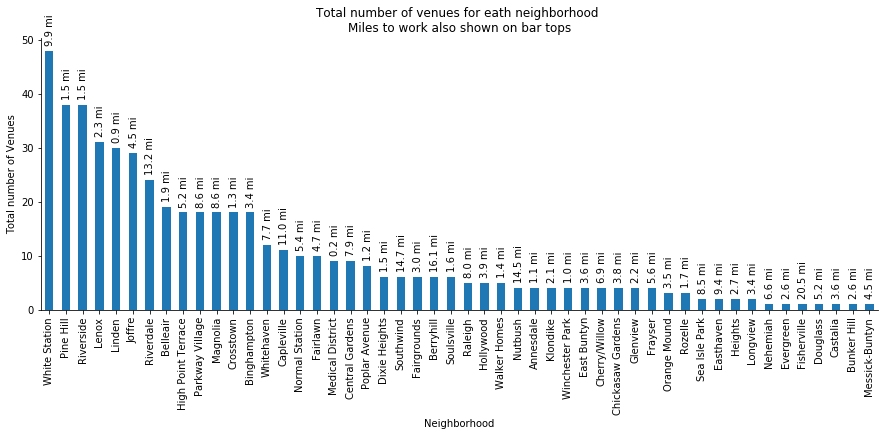

In [97]:
ax = memphis_venue_numbers.plot.bar(x = 'Neighborhood', y = 'Venue Category', figsize=(15,5))

# Cleanup a bit
ax.set_ylabel('Total number of Venues')
ax.legend(bbox_to_anchor=(1, 1.))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()

for i, v in enumerate(memphis_venue_numbers['Venue Category']):
    ax.text(i-0.25, v + 1, 
            str(round(memphis_venue_numbers.miles_to_work[i],1)) + ' mi', 
            color='k',rotation = 90, verticalalignment = 'bottom')
ax.title.set_text('Total number of venues for eath neighborhood \nMiles to work also shown on bar tops')

According to the graph, it is clear that the top place for a lot of amenities is White Station. However, it is roughly 10 miles away from the workplace. On the other hand, the next top four neighbourhoods in terms of venues, Riverside, Pine Hill, Lenox, and Linden all situated less than 3 miles from the workplace. Sweet!


Let's find out how many different catogiries of amanities we have.

In [98]:
print('There are {} uniques categories.'.format(len(Memphis_venues['Venue Category'].unique())))

There are 158 uniques categories.


158 different categories. Not bad... not bad at all.

### 2.5 Analyze Each Neighborhood to find how many unique catogories are belongs to each neighborhood


My goal is to find the best neighborhood that has so many unique amenities close by. I am planning to use the k-means algorithm. For that, I would like to create another data frame that has all our neighborhoods in the first column and frequency of different categories of amenities in the next columns. So I should have columns equal to the number of different categories I found from the previous section + 1 (for the Neighborhood  name column). Let's creae a dummy data frame and then we will fill the fields with the mean.

In [99]:
# one hot encoding
Memphis_onehot = pd.get_dummies(Memphis_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
Memphis_onehot['Neighborhood'] = Memphis_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Memphis_onehot.columns[-1]] + list(Memphis_onehot.columns[:-1])
Memphis_onehot = Memphis_onehot[fixed_columns]

Memphis_onehot.sample(n = 5)

,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bakery,Ballroom,Bank,Bar,Baseball Field,Basketball Court,Big Box Store,Boutique,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,...,Sake Bar,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Tanning Salon,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track Stadium,Trail,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Store,Watch Shop,Wine Bar,Wings Joint,Women's Store
65,Belleair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
379,Riverside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
506,Glenview,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
369,Riverside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
237,White Station,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's fill the data frame with real data, aka the mean number of different categories of amenities. 

In [100]:
Memphis_grouped = Memphis_onehot.groupby('Neighborhood').mean().reset_index()

# Add miles to work to the data frame
Memphis_grouped = pd.merge(Memphis_grouped,memphis_df[['Neighborhood','miles_to_work']],on='Neighborhood', how='left')

# See how many rows and columns
print(Memphis_grouped.shape)

Memphis_grouped.sample(n = 5)

(50, 160)


,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bakery,Ballroom,Bank,Bar,Baseball Field,Basketball Court,Big Box Store,Boutique,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,...,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Tanning Salon,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track Stadium,Trail,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Store,Watch Shop,Wine Bar,Wings Joint,Women's Store,miles_to_work
4,Bunker Hill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2.639895
5,Capleville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0,0.0,0.00,0.0,11.001431
46,Walker Homes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.200000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.398737
20,Glenview,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,2.208302
22,High Point Terrace,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.055556,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5.182510


It turns out that different neighborhoods have different strength as the top comment venue for each neighborhood is different. For example, if you are a person who likes Music you might want to go to Belleair, but if you are someone you want to access to the gym every day, you might find Bunker Hill is better. Did I lose you for a moment? Ok, let me show what I mean. Let me show you what are the best 10 common venues near each neighborhood. See below. 

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [102]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Memphis_grouped['Neighborhood']

for ind in np.arange(Memphis_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Memphis_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annesdale,miles_to_work,Discount Store,Gym,American Restaurant,Watch Shop,Fish Market,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium,Food Truck
1,Belleair,miles_to_work,Sports Bar,Golf Course,Music Venue,Art Museum,Arts & Crafts Store,Bar,Burger Joint,Cajun / Creole Restaurant,Deli / Bodega
2,Berryhill,miles_to_work,Rental Car Location,Discount Store,Tanning Salon,Shipping Store,Pizza Place,Pharmacy,Fish Market,Football Stadium,Food Truck
3,Binghampton,miles_to_work,Art Gallery,Bar,Furniture / Home Store,Skate Park,Business Service,Clothing Store,Coffee Shop,Brewery,Breakfast Spot
4,Bunker Hill,miles_to_work,Gym Pool,Garden,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Food & Drink Shop


I think by looking at the table above you might understand that different neighborhoods have different amenities strength. The best neighborhood depends on which kind of amenities are around you and what your choises are. 

With this, I am done with my data preperation and preliminary analysis of the data. Let's move on to real machine learning.

## 4. Cluster Neighbourhoods


For this study, I am going to use K-means clustering algorythm. Since we have unlabled data, I think this will be a very good starting point to do an unsupervised algorythm. However, I am not 100 % sure how many clusters to choose. We will do some calculations to find the best number of clusters

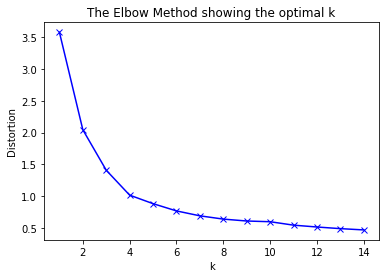

    American Restaurant  Antique Shop  ...  Wings Joint  Women's Store
0              0.250000      0.000000  ...     0.000000       0.000000
1              0.052632      0.000000  ...     0.000000       0.000000
2              0.000000      0.000000  ...     0.000000       0.000000
3              0.000000      0.055556  ...     0.000000       0.000000
4              0.000000      0.000000  ...     0.000000       0.000000
5              0.000000      0.000000  ...     0.000000       0.000000
6              0.000000      0.000000  ...     0.000000       0.000000
7              0.000000      0.000000  ...     0.000000       0.000000
8              0.000000      0.000000  ...     0.000000       0.000000
9              0.000000      0.000000  ...     0.000000       0.000000
10             0.055556      0.000000  ...     0.000000       0.000000
11             0.000000      0.000000  ...     0.166667       0.000000
12             0.000000      0.000000  ...     0.000000       0.000000
13    

In [145]:
# set number of clusters
maxK = 15
Memphis_grouped_clustering = Memphis_grouped.drop('Neighborhood', 1)

# print(Memphis_grouped_clustering)
distortion = []
from scipy.spatial.distance import cdist

for k in range(1,maxK):
  
  
  # run k-means clustering
  kmeans = KMeans(n_clusters=k,random_state = 0).fit(Memphis_grouped_clustering)

  # check cluster labels generated for each row in the dataframe
  #print(kmeans.labels_)
  
  distortion.append(sum(np.min(cdist(Memphis_grouped_clustering, kmeans.cluster_centers_, 'euclidean'), axis=1)) / Memphis_grouped_clustering.shape[0])
  

#print(distortion)
Memphis_grouped_clustering = Memphis_grouped_clustering.drop('miles_to_work',1)
plt.plot(np.arange(1,maxK),distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

print(Memphis_grouped_clustering)

As the number of clusters increases, the centroids becomes closer to their clusters. This makes the distortion decrease as you increase K. You will get he minimum distortion when the number of clusters is exactly equal to the number of data points, so the distortion becomes zero. But notice the graph has a sudden variation of the slope at k = 4. Therefore, according to the Elbow method, we will consider this point as the best number of clusters as beyond this point the improvement of distortion is minimal.

Let's rerun the K-mean method with k =  4.

In [146]:
kclusters = 4

# print(Memphis_grouped_clustering)
  
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state = 0).fit(Memphis_grouped_clustering)

kmeans.labels_



array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [141]:
# add clustering labels

try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1,inplace = True) 
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)  
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) # Uncomment this when run first time

Memphis_merged = memphis_df
Memphis_merged.head()
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Memphis_merged = Memphis_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Memphis_merged.head() # check the last columns!

# Drop the rows with no cluster labels
Memphis_merged.dropna(inplace=True)

Memphis_merged.head()

,Burrow,Neighborhood,Latitude,Longitude,Address,miles_to_work,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown,Linden,35.134366,-90.012674,"Linden Avenue, Medical District, Memphis, Shel...",0.933458,1.0,miles_to_work,Mobile Phone Shop,Pizza Place,Fast Food Restaurant,Sandwich Place,Shipping Store,Music Venue,Southern / Soul Food Restaurant,Bar,Donut Shop
1,Downtown,Medical District,35.141978,-90.030331,"Medical District, Memphis, Shelby County, Tenn...",0.242469,1.0,miles_to_work,Sandwich Place,Fried Chicken Joint,Fast Food Restaurant,Clothing Store,Food Court,Restaurant,Lawyer,Hotel,Financial or Legal Service
2,Downtown,Winchester Park,35.152504,-90.036226,"Winchester Park, Medical District, Memphis, Sh...",1.040376,1.0,miles_to_work,Southern / Soul Food Restaurant,Drugstore,BBQ Joint,Gym / Fitness Center,Food & Drink Shop,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium,Food Truck
3,Midtown,Annesdale,35.125646,-90.017868,"Annesdale-Snowden, Shelby County, Tennessee, 3...",1.086544,1.0,miles_to_work,Discount Store,Gym,American Restaurant,Watch Shop,Fish Market,Frozen Yogurt Shop,Fried Chicken Joint,Football Stadium,Food Truck
4,Midtown,Belleair,35.141008,-89.993866,"Belleair Drive, Memphis, Shelby County, Tennes...",1.949036,1.0,miles_to_work,Sports Bar,Golf Course,Music Venue,Art Museum,Arts & Crafts Store,Bar,Burger Joint,Cajun / Creole Restaurant,Deli / Bodega


In [138]:
# create map

map_clusters = folium.Map(location=[lat0, lon0], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Memphis_merged

# add markers to the map
#markers_colors = []
for lat, lon, poi, cluster, miles in zip(Memphis_merged['Latitude'], Memphis_merged['Longitude'], Memphis_merged['Neighborhood'], Memphis_merged['Cluster Labels'].astype('int'),Memphis_merged['miles_to_work']):
    label = folium.Popup(str(poi)  + ' Cluster ' + str(cluster) + " " +  str(round(miles,2)) + " miles", parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [0]:
# Following wikipedia page has all the neighborhood data. Let's use Beautiful Soup to get the required data.
url = 'https://en.wikipedia.org/wiki/List_of_neighborhoods_of_St._Louis'
source = rs.get(url)
soup = bs(source.content,'lxml')
 # print(soup.prettify())

In [0]:
contents = soup.body.findAll('table')

#print(contents)

# Variables to store data
column_titles = []

table_data = []
# Table data
for trtag in contents[1].findAll('tr'):
    #print(trtag)
    #print(trtag.text)
    #column_titles.append(trtag.text.strip())'
    #print('zzz')
    data_row = trtag.text.strip()
    data_row = data_row.split('\n')
    #data_row = data_row.replace("\n",",")
    #print(data_row)
    table_data.append(data_row)

# First line is column titles
column_titles = table_data[0]
del(table_data[0]) # Remove firt line from the table data

#print(column_titles)
#print(table_data)

st_louis_df = pd.DataFrame(table_data, columns = column_titles)
# pd.DataFrame(neighborhood, columns=['Burrow','Neighborhood'])

st_louis_df.head()


,Neighborhood,Population,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race,Corridor
0,Academy,"3,006",16.9,54.7,20.5,1.52,4.3,3.5,North
1,Baden,"7,268",6.3,91.8,0.5,0.1,0,1.3,North
2,Benton Park,"3,532",68.2,25.1,3.2,0.3,1.2,3.8,South
3,Benton Park West,"4,404",28.0,59.6,10.5,0,1.9,5.1,South
4,Bevo Mill,"12,654",74.2,13.8,7.5,0.4,4.6,3.9,South


In [0]:
# How many neighborhoods (There suppose to be 79 neighborhoods, Yes, I counted number of neighborhoods in the wiki page)
st_louis_df.shape

(79, 9)

In [0]:
# Covert the numbers to numbers
print("Before...")
print(st_louis_df.dtypes)
st_louis_df.Population = st_louis_df.Population.str.replace(',', '')
st_louis_df.Population = pd.to_numeric(st_louis_df.Population)
st_louis_df.White = pd.to_numeric(st_louis_df.White)
st_louis_df.Black = pd.to_numeric(st_louis_df.Black)
st_louis_df["Hispanic/Latino2"] = pd.to_numeric(st_louis_df["Hispanic/Latino2"])
st_louis_df.AIAN1 = pd.to_numeric(st_louis_df.AIAN1)
st_louis_df.Asian = pd.to_numeric(st_louis_df.Asian)
st_louis_df["Mixed Race"] = pd.to_numeric(st_louis_df["Mixed Race"])

print("\n Now...")
print(st_louis_df.dtypes)

Before...
Neighborhood        object
Population          object
White               object
Black               object
Hispanic/Latino2    object
AIAN1               object
Asian               object
Mixed Race          object
Corridor            object
dtype: object

 Now...
Neighborhood         object
Population            int64
White               float64
Black               float64
Hispanic/Latino2    float64
AIAN1               float64
Asian               float64
Mixed Race          float64
Corridor             object
dtype: object


In [0]:
st_louis_df.head()

,Neighborhood,Population,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race,Corridor
0,Academy,3006,16.9,54.7,20.5,1.52,4.3,3.5,North
1,Baden,7268,6.3,91.8,0.5,0.10,0.0,1.3,North
2,Benton Park,3532,68.2,25.1,3.2,0.30,1.2,3.8,South
3,Benton Park West,4404,28.0,59.6,10.5,0.00,1.9,5.1,South
4,Bevo Mill,12654,74.2,13.8,7.5,0.40,4.6,3.9,South


In [0]:
# Which region is popular for different ethnic groups?
st_louis_mean_demogra = st_louis_df.groupby('Corridor').mean()
st_louis_mean_demogra.drop("Population", axis = 1, inplace = True)
st_louis_mean_demogra

,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race
Corridor,,,,,,
Central,51.820000,40.145000,2.645000,0.210000,4.640000,2.500000
North,7.148387,88.912903,2.306452,0.239355,0.435484,1.470968
South,64.967857,27.175000,4.625000,0.292857,2.389286,3.403571


It looks like most white popole live in South side has more white people, north side is dominated by black people, Asian tends to go in the Central reagin. Let's try to see this graphically.

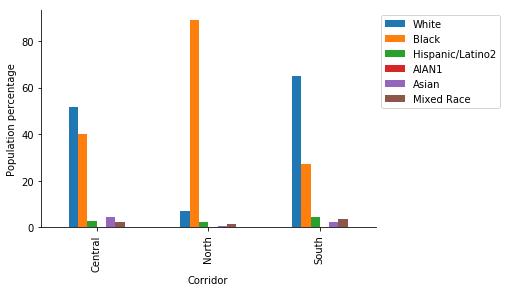

In [0]:
ax = st_louis_mean_demogra.plot.bar()
ax.set_ylabel('Population percentage')
ax.legend(bbox_to_anchor=(1, 1.))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [0]:
# Get the latitude and logitude of the each neighborhood
geolocator = Nominatim(user_agent="foursquare_agent", format_string="%s, St. Louis" )

Lat = []
Lon =[]
address = []
distance_to_work = []

# Latitude longitude for the prospective work place in St. Louis
Lat0 = 38.625145
Lon0 = -90.191127

for i in range(st_louis_df.shape[0]):
    try:
        location = geolocator.geocode(st_louis_df['Neighborhood'][i])
        print('.', end = ' ')
    except:
        location = None
    
    if location != None:
        Lat.append(location.latitude)
        Lon.append(location.longitude)
        address.append(location.address)
        distance_to_work.append(find_distance(location.latitude,location.longitude,Lat0, Lon0))
    else:
        Lat.append('NaN')
        Lon.append('NaN')
        address.append('NaN')
        distance_to_work.append('NaN')

print('Done!')

. 

NameError: ignored

In [0]:
# Add lat lon to the data frame
st_louis_df['Latitude'] = Lat
st_louis_df['Longitude'] = Lon
st_louis_df['Address'] = address
st_louis_df['miles_to_work'] = distance_to_work
st_louis_df.head()

In [0]:
st_louis_venues = getNearbyVenues(names=st_louis_df['Neighborhood'],
                                    latitudes = st_louis_df['Latitude'], longitudes = st_louis_df['Longitude'])

In [0]:
st_louis_venues.groupby('Neighborhood').count()

In [0]:
print('There are {} uniques categories.'.format(len(Memphis_venues['Venue Category'].unique())))

### Analyze each neighborhood

In [0]:
# one hot encoding
st_louis_onehot = pd.get_dummies(st_louis_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
st_louis_onehot['Neighborhood'] = st_louis_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [st_louis_onehot.columns[-1]] + list(st_louis_onehot.columns[:-1])
st_louis_onehot = st_louis_onehot[fixed_columns]

st_louis_onehot.head()

In [0]:
st_louis_grouped = st_louis_onehot.groupby('Neighborhood').mean().reset_index()
st_louis_grouped.head()

In [0]:
num_top_venues = 5

for hood in st_louis_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = st_louis_grouped[st_louis_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [0]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = st_louis_grouped['Neighborhood']

for ind in np.arange(Memphis_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(st_louis_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

In [0]:
# set number of clusters
kclusters = 5
Memphis_grouped_clustering = st_louis_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Memphis_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

In [0]:
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)   
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) # Uncomment this when run first time

st_louis_merged = st_louis_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
st_louis_merged = st_louis_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#Memphis_merged.head() # check the last columns!

# Drop the rows with no cluster labels
st_louis_merged.dropna(inplace=True)

st_louis_merged

In [0]:
# create map

# lat lon for toronto
latitude = Lat0
longitude = Lon0

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

Memphis_merged

# add markers to the map
#markers_colors = []
for lat, lon, poi, cluster, miles in zip(st_louis_merged['Latitude'], st_louis_merged['Longitude'], st_louis_merged['Neighborhood'], st_louis_merged['Cluster Labels'].astype('int'),st_louis_merged['miles_to_work']):
    miles = str(round(float(miles),1))
    label = folium.Popup(str(poi)  + ' Cluster ' + str(cluster) + " " + miles + " miles", parse_html=True)
    #label = folium.Popup(str(poi))
    
    #print(label.dtype())
    try:
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_clusters) 
    except:
        pass
       
map_clusters

In [0]:
x = 'a'

In [0]:
print(x[0])

In [0]:
x = 'ab'

In [0]:
print(x[0:1+1])